# Import packages

In [16]:
from pandas_datareader import data

from sklearn.metrics import classification_report
# Plotting 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical calculation
from scipy.stats import norm


from numpy import log as ln
import numpy as np
from math import *
import datetime
import seaborn as sn

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


from scipy.stats import shapiro



import pandas as pd 
print(abs(-100))

import sys
import plotly.graph_objs as go  

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Check if local computer has the library yfinance. If not, install. Then Import it.
#!{sys.executable} -m pip install yfinance # Check if the machine has yfinance, if not, download yfinance
import yfinance as yf # Import library to access Yahoo finance stock data
# Add financial information and indicators 
#!{sys.executable} -m pip install ta # Download ta
from ta import add_all_ta_features # Library that does financial technical analysis

import  ta 
import plotly.express as px







from sklearn.metrics import silhouette_samples,silhouette_score
import seaborn as sns

100



# Data engineering

In [17]:
# use thiiiiiiiiiiiiiiiiiiiiiiiiiis
class Data_engineering:

    ticker = ""
    data=pd.DataFrame()
    data=pd.DataFrame()
    data=pd.DataFrame()

    def __init__(self,ticker):
        self.ticker=ticker

            
    def Var_STD_Mean(self):
        #df2_tidy = self.data.rename(columns = {self.ticker: 'Adj Close'}, inplace = False)
        df2_tidy = self.data.rename(columns = {self.ticker: 'sp500'}, inplace = False)
        self.stats["mean"]=df2_tidy.mean()
        self.stats["Std.Dev"]=df2_tidy.std()
        self.stats["Var"]=df2_tidy.var()
        self.variance =  self.stats["Var"]
        return self.stats

    def add_Indicator(self,tickerSymbol,start,end):
      tickerData = yf.Ticker(tickerSymbol)

      # Create historic data dataframe and fetch the data for the dates given. 
      df = tickerData.history(start = '2012-01-01', end = '2021-01-01')

      data_indic=pd.DataFrame()
      #RSI
      data_indic["RSI_14"]=ta.momentum.RSIIndicator(close= df['Close'],  window= 14, fillna = False).rsi() 
      data_indic["RSI_5"]=ta.momentum.RSIIndicator(close= df['Close'],  window= 5, fillna = False).rsi() 
      data_indic["RSI_7"]=ta.momentum.RSIIndicator(close= df['Close'],  window= 7, fillna = False).rsi() 
      data_indic["RSI_50"]=ta.momentum.RSIIndicator(close= df['Close'],  window= 50, fillna = False).rsi() 
      #ROC
      data_indic["ROC_12"]=ta.momentum.roc(close= df['Close'],  window= 12, fillna = False)
      data_indic["ROC_25"]=ta.momentum.roc(close= df['Close'],  window= 25, fillna = False)
      data_indic["ROC_200"]=ta.momentum.roc(close= df['Close'],  window= 200, fillna = False)
      #MACD
      data_indic["MACD"]=ta.trend.MACD(close= df['Close'], window_slow= 26, window_fast = 12, window_sign = 9, fillna = False).macd() 
      #TRIX
      data_indic["TRIX_15"]=ta.trend.TRIXIndicator(close= df['Close'],  window= 15, fillna = False).trix()
      data_indic["TRIX_30"]=ta.trend.TRIXIndicator(close= df['Close'],  window= 30, fillna = False).trix()
      #MA
      data_indic["MA_10"]=ta.volatility.bollinger_mavg(close= df['Close'],  window= 10, fillna = False)
      data_indic["MA_20"]=ta.volatility.bollinger_mavg(close= df['Close'],  window= 20, fillna = False)
      data_indic["MA_50"]=ta.volatility.bollinger_mavg(close= df['Close'],  window= 50, fillna = False)
      data_indic["MA_100"]=ta.volatility.bollinger_mavg(close= df['Close'],  window= 100, fillna = False)
      data_indic["MA_200"]=ta.volatility.bollinger_mavg(close= df['Close'],  window= 200, fillna = False)
      #EMA
      data_indic["EMA_12"]=ta.trend.EMAIndicator(close= df['Close'],  window= 12, fillna = False).ema_indicator()
      data_indic["EMA_26"]=ta.trend.EMAIndicator(close= df['Close'],  window= 26, fillna = False).ema_indicator()
      data_indic["EMA_50"]=ta.trend.EMAIndicator(close= df['Close'],  window= 50, fillna = False).ema_indicator()
      data_indic["EMA_200"]=ta.trend.EMAIndicator(close= df['Close'],  window= 200, fillna = False).ema_indicator()
      #ADX
      data_indic["ADX"]=ta.trend.adx(high= df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
      #CCI
      data_indic["CCI"]=ta.trend.CCIIndicator(high= df['High'], low=df['Low'], close=df['Close'], window= 20, constant = 0.015, fillna = False).cci()
      #VI
      data_indic["NegativeVolume"]=ta.volume.NegativeVolumeIndexIndicator(close=df['Close'], volume=df['Volume'], fillna = False).negative_volume_index()

      data_indic["ADI"]=ta.volume.acc_dist_index(high= df['High'], low=df['Low'], close=df['Close'],  volume=df['Volume'], fillna=False)
      data_indic["MFI"]=ta.volume.money_flow_index(high= df['High'], low=df['Low'], close=df['Close'],  volume=df['Volume'],window=14, fillna=False)
      data_indic["OBV"]=ta.volume.on_balance_volume( close=df['Close'],  volume=df['Volume'], fillna=False)
      indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)
      # Add Bollinger Bands features
      data_indic["Bollinger_mavg"] = indicator_bb.bollinger_mavg()
      data_indic["Bollinger_hband"] = indicator_bb.bollinger_hband()
      data_indic["Bollinger_lband"] = indicator_bb.bollinger_lband()

      # Add Bollinger Band high indicator
      data_indic["Bollinger_hband_indicator"] = indicator_bb.bollinger_hband_indicator()

      # Add Bollinger Band low indicator
      data_indic["Bollinger_lband_indicator"] = indicator_bb.bollinger_lband_indicator()
      return data_indic

    def return_func(self,df,day,column_name):
      ff=df.copy()
      ff["label_return_"+str(day)+"_"+column_name[9:]]=ff[column_name].pct_change(day).shift(-day)
      return ff
   
    def new_label(self,AMZN_,plafond_gain,plancher_perte,time_barrier,column_name):
      AMZN_1=AMZN_.copy()
      AMZN_1['return']=AMZN_1[column_name].pct_change()

      AMZN_1=AMZN_1.dropna()
      l=[]
      plafond_gainv=plafond_gain
      plancher_pertev=plancher_perte
      alpha=0
      for i in range( AMZN_1.shape[0]-time_barrier):
          for j in range(i,i+time_barrier):
              if AMZN_1["return"][j] > 0.02:
                  alpha=1
                  l.append(alpha)
                  break
              
              elif AMZN_1["return"][i] < -0.01:
                  alpha=-1
                  l.append(alpha)
                  break
              else :
                  if j== i+time_barrier-1:
                      k=(AMZN_1["Adj CloseAMZN"][i+time_barrier-1]-AMZN_1["Adj CloseAMZN"][i])/AMZN_1["Adj CloseAMZN"][i]
                      if k>1:
                          alpha=1
                          l.append(alpha)
                      else :
                          alpha=-1  
                          l.append(alpha)

      new_lab=pd.DataFrame(data=l, columns=["new_ label_return"],index=AMZN_1.index[:-time_barrier])
      df=pd.concat([AMZN_1,new_lab], axis=1)
      df=df.dropna()
      return df

    def prepare_data2(self,AMZN_,SP500,Indicateur,plafond_gain,plancher_perte,time_barrier):
      new_data=self.new_label(AMZN_,plafond_gain,plancher_perte,time_barrier,"Adj CloseAMZN")
      new_dataSP500=self.return_func(SP500,1,"Adj CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="Adj CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="VolumeSP500")
      #new_dataSP500.columns=new_dataSP500.column+"_sp500"
    
 
      #new_data=new_data.drop(columns="Adj CloseAMZN")
      new_data=new_data.drop(columns="CloseAMZN")
      new_data = new_data.rename(columns = {'Adj CloseAMZN': 'close', }, inplace = False)

      new_data_f=pd.concat([new_dataSP500,new_data], axis=1)
                
      return pd.merge(Indicateur, new_data_f, left_index=True, right_index=True)         

    """def prepare_data(self,AMZN_,SP500,Indicateur,return_val, day_pred):

 

      new_data=self.return_func(AMZN_,day_pred,"Adj CloseAMZN")
      new_dataSP500=self.return_func(SP500,day_pred,"Adj CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="Adj CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="CloseSP500")
      new_dataSP500=new_dataSP500.drop(columns="VolumeSP500")
      #new_dataSP500.columns=new_dataSP500.column+"_sp500"
    
      
      new_data=new_data.dropna()
      for i in new_data.columns[-1:]:
        print(i)
        for j in range(new_data.shape[0]):
          if new_data[i][j]> return_val:
            new_data[i][j]=1
          else:
            new_data[i][j]=0   

      #new_data2=self.return_func(AMZN_,1,"Adj CloseAMZN")
      #new_data2=new_data2.dropna()
      #new_data["daily_return"]=new_data2.iloc[:,-1].to_list()
      new_data=new_data.drop(columns="Adj CloseAMZN")
      new_data=new_data.drop(columns="CloseAMZN")

      new_data_f=pd.concat([new_dataSP500,new_data], axis=1)
                
      return pd.merge(Indicateur, new_data_f, left_index=True, right_index=True)"""

    def one_days(self,the_data):
     # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)

      return the_data

    """def two_days(self,the_data):
     # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:]
      data2=the_data[1:]
      data2.index=data1.index[:-1]
      data2.columns=data2.columns+"_day_2"
      aa=pd.concat([data1,data2], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa"""
      
    def two_days(self,the_data):
    # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-1]
      data2=the_data[1:]

    
      data1.index=data2.index
      data1.columns=data1.columns+"_day_2"
      aa=pd.concat([data1,data2], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa  


    def three_days(self,the_data):
      #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-2]
      data2=the_data[1:-1]
      data3=the_data[2:]

      data1.index=data3.index
      data2.index=data3.index
      data1.columns=data1.columns+"_day_3"
      data2.columns=data2.columns+"_day_2"
      dd=pd.concat([data1,data2,data3], axis=1,)
   
      #dd=dd.drop(dd.columns[-2], axis=1)
      return dd
    def four_days(self,the_data):
      #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-3]
      data2=the_data[1:-2]
      data3=the_data[2:-1]
      data4=the_data[3:]

      data2.index=data4.index
      data3.index=data4.index
      data1.index=data4.index
      data3.columns=data3.columns+"_day_2"
      data2.columns=data2.columns+"_day_3"
      data1.columns=data1.columns+"_day_4"
      aa=pd.concat([data1,data2,data3,data4], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
      
    def five_days(self,the_data):
      #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-4]
      data2=the_data[1:-3]
      data3=the_data[2:-2]
      data4=the_data[3:-1]
      data5=the_data[4:]

      data2.index=data5.index
      data3.index=data5.index
      data4.index=data5.index
      data1.index=data5.index
      data4.columns=data4.columns+"_day_2"
      data3.columns=data3.columns+"_day_3"
      data2.columns=data2.columns+"_day_4"
      data1.columns=data1.columns+"_day_5"
      aa=pd.concat([data1,data2,data3,data4,data5], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
      
    def six_days(self,the_data):
     # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-5]
      data2=the_data[1:-4]
      data3=the_data[2:-3]
      data4=the_data[3:-2]
      data5=the_data[4:-1]
      data6=the_data[5:]

      data2.index=data6.index
      data3.index=data6.index
      data4.index=data6.index
      data5.index=data6.index
      data1.index=data6.index
      data5.columns=data5.columns+"_day_2"
      data4.columns=data4.columns+"_day_3"
      data3.columns=data3.columns+"_day_4"
      data2.columns=data2.columns+"_day_5"
      data1.columns=data1.columns+"_day_6"
      aa=pd.concat([data1,data2,data3,data4,data5,data6], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
      
    def seven_days(self,the_data):
     # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-6]
      data2=the_data[1:-5]
      data3=the_data[2:-4]
      data4=the_data[3:-3]
      data5=the_data[4:-2]
      data6=the_data[5:-1]
      data7=the_data[6:]

      data2.index=data7.index
      data3.index=data7.index
      data4.index=data7.index
      data5.index=data7.index
      data6.index=data7.index
      data1.index=data7.index
      data6.columns=data6.columns+"_day_2"
      data5.columns=data5.columns+"_day_3"
      data4.columns=data4.columns+"_day_4"
      data3.columns=data3.columns+"_day_5"
      data2.columns=data2.columns+"_day_6"
      data1.columns=data1.columns+"_day_7"
      aa=pd.concat([data1,data2,data3,data4,data5,data6,data7], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
      
    def eight_days(self,the_data):
      #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-7]
      data2=the_data[1:-6]
      data3=the_data[2:-5]
      data4=the_data[3:-4]
      data5=the_data[4:-3]
      data6=the_data[5:-2]
      data7=the_data[6:-1]
      data8=the_data[7:]

      data2.index=data8.index
      data3.index=data8.index
      data4.index=data8.index
      data5.index=data8.index
      data6.index=data8.index
      data7.index=data8.index
      data1.index=data8.index
      data7.columns=data7.columns+"_day_2"
      data6.columns=data6.columns+"_day_3"
      data5.columns=data5.columns+"_day_4"
      data4.columns=data4.columns+"_day_5"
      data3.columns=data3.columns+"_day_6"
      data2.columns=data2.columns+"_day_7"
      data1.columns=data1.columns+"_day_8"
      aa=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
      
    def nine_days(self,the_data):
      #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-8]
      data2=the_data[1:-7]
      data3=the_data[2:-6]
      data4=the_data[3:-5]
      data5=the_data[4:-4]
      data6=the_data[5:-3]
      data7=the_data[6:-2]
      data8=the_data[7:-1]
      data9=the_data[8:]

      data2.index=data9.index
      data3.index=data9.index
      data4.index=data9.index
      data5.index=data9.index
      data6.index=data9.index
      data7.index=data9.index
      data8.index=data9.index
      data1.index=data9.index
      data8.columns=data8.columns+"_day_2"
      data7.columns=data7.columns+"_day_3"
      data6.columns=data6.columns+"_day_4"
      data5.columns=data5.columns+"_day_5"
      data4.columns=data4.columns+"_day_6"
      data3.columns=data3.columns+"_day_7"
      data2.columns=data2.columns+"_day_8"
      data1.columns=data1.columns+"_day_9"
      aa=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa
    def ten_days(self,the_data):
     # the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
      the_data=the_data.dropna(axis=0)
      data1=the_data[0:-9]
      data2=the_data[1:-8]
      data3=the_data[2:-7]
      data4=the_data[3:-6]
      data5=the_data[4:-5]
      data6=the_data[5:-4]
      data7=the_data[6:-3]
      data8=the_data[7:-2]
      data9=the_data[8:-1]
      data10=the_data[9:]

      data2.index=data10.index
      data3.index=data10.index
      data4.index=data10.index
      data5.index=data10.index
      data6.index=data10.index
      data7.index=data10.index
      data8.index=data10.index
      data9.index=data10.index
      data1.index=data10.index
      data9.columns=data9.columns+"_day_2"
      data8.columns=data8.columns+"_day_3"
      data7.columns=data7.columns+"_day_4"
      data6.columns=data6.columns+"_day_5"
      data5.columns=data5.columns+"_day_6"
      data4.columns=data4.columns+"_day_7"
      data3.columns=data3.columns+"_day_8"
      data2.columns=data2.columns+"_day_9"
      data1.columns=data1.columns+"_day_10"
      aa=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10], axis=1,)
      #aa=aa.drop(aa.columns[-2], axis=1)
      return aa

    def get_ticker_data(self,tickerSymbol,start,end,column_name):
            AMZN_ = data.get_data_yahoo(tickerSymbol,start,end,interval="d")#['Adj Close']
            #AMZN_=AMZN_.to_frame()
            #AMZN_ = AMZN_.rename(columns={'Adj Close': column_name})
            AMZN_.columns=AMZN_.columns+column_name
            return AMZN_

    def Data_eng(self,i,Indicateur,AMZN_,SP500,plafond_gain,plancher_perte,time_barrier):
            #the_data=self.prepare_data(AMZN_,SP500,Indicateur,threshold,pred)
            the_data=self.prepare_data2(AMZN_,SP500,Indicateur,plafond_gain,plancher_perte,time_barrier)
            
         
            switcher={
                    1: self.one_days(the_data),
                    2: self.two_days(the_data),
                    3: self.three_days(the_data),
                    4: self.four_days(the_data),
                    5: self.five_days(the_data),
                    6: self.six_days(the_data),
                    7: self.seven_days(the_data),
                    8: self.eight_days(the_data),
                    9: self.nine_days(the_data),
                    10:self.ten_days(the_data)
                    }
            
            return switcher.get(i) 

    """def Data_eng2(self,i,tickerSymbol,start,end,threshold,pred):
            Indicateur=self.add_Indicator(tickerSymbol,start,end)
            AMZN_ = data.get_data_yahoo(tickerSymbol,start,end,interval="d")['Adj Close']
            AMZN_=AMZN_data.to_frame()
            AMZN_ = AMZN_.rename(columns={'Adj Close': 'AMZN Adj Close'})
            if pred==1:
              return self.one_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==2:  
              return self.two_days((AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==3:
              return self.three_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==4:
              return self.four_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==5:
              return self.five_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==6:
              return self.six_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==7:
              return self.sevne(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==8:
              return self.eight_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==9:
              return self.nine_days(AMZN_,SP500,Indicateur,threshold,pred)
            elif pred==10:
              return self.ten_days(AMZN_,SP500,Indicateur,threshold,pred)"""



# data eng test

In [18]:
amzn_data__=Data_engineering("amzn")

Indicateur=amzn_data__.add_Indicator('amzn','2012-01-01','2021-01-01')
AMZN_ = amzn_data__.get_ticker_data('amzn','2012-01-01','2021-01-01','AMZN') 
SP500 = amzn_data__.get_ticker_data('^GSPC','2012-01-01','2021-01-01',"SP500") 

C:\Users\raedc\anaconda3\envs\rag\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\raedc\anaconda3\envs\rag\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [19]:
SP500

,HighSP500,LowSP500,OpenSP500,CloseSP500,VolumeSP500,Adj CloseSP500
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059,1885090000,3703.060059
2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107,3527460000,3735.360107
2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039,3387030000,3727.040039


# feature engineering

## Fractional Differencing

In [20]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

In [21]:
def Differencing2(test1):
  liss=[]
  for i in test1.columns:
    if "MA" in i or "EMA" in i or "ROC" in i or "NegativeVolume" in i or "ADI" in i or "Bollinger_mavg" in i or "Bollinger_lband" in i or "OBV" in i or "Bollinger_hband" in i:
      #print(i)
      liss.append(i)
  f1=liss

  

 
  liss2=[]
  for i in test.columns:
    if "High" in i or "Low" in i or "Open" in i or "VolumeA" in i :
      #print(i)
      liss2.append(i)


  for i in  test1.columns:
    if  i.startswith("EMA") :
      test1[i][20:]=ts_differencing(test1[i],0.9,20).values
    if i.startswith("MA"):
      test1[i][20:]=ts_differencing(test1[i],0.98,20).values
    
  for s in  f1:    
    test1[s][20:]=ts_differencing(test1[s],0.9,20).values
    test1=test1.dropna()
  for s1 in  liss2:    
    #test1[liss2]=test1[liss2].diff(periods=1)
    test1[s1][20:]=ts_differencing(test1[s1],0.9,20).values
    test1=test1.dropna()
  return test1 [50:]

# Modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import time
import seaborn as sns # data visualization library  
from statsmodels.tsa.stattools import adfuller
import plotly.figure_factory as ff

In [23]:
features=['RSI_14', 'RSI_5', 'RSI_7', 'RSI_50', 'ROC_12', 'ROC_25', 'ROC_200',
       'MACD', 'TRIX_15', 'TRIX_30', 'MA_10', 'MA_20', 'MA_50', 'MA_100',
       'MA_200', 'EMA_12', 'EMA_26', 'EMA_50', 'EMA_200', 'ADX', 'CCI',
       'NegativeVolume', 'ADI', 'MFI', 'OBV', 'Bollinger_mavg',
       'Bollinger_hband', 'Bollinger_lband', 'Bollinger_hband_indicator',
       'Bollinger_lband_indicator', "return1"]

In [24]:
test=amzn_data__.Data_eng(2,Indicateur,AMZN_,SP500,0.02,-0.01,10)
test=test.dropna()
test=test.drop(columns="close")
df=Differencing2(test)
#df=df.iloc[:200,]
features=df.columns.to_list()
y_data=df[features[-1]]
liss3=[]
for i in df.columns:
  if "return" in i  :
    #print(i)
    liss3.append(i)

for i in liss3[:]:

  features.remove(i)    

X_data=df[features]

In [25]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
for i in X_data.columns:
  adf = adfuller(X_data[i])
  print("p-value of "+str(i)+" : {}".format(float(adf[1])))

p-value of RSI_14_day_2 : 3.048148000571931e-15
p-value of RSI_5_day_2 : 2.5729164065150093e-26
p-value of RSI_7_day_2 : 1.760289736351461e-23
p-value of RSI_50_day_2 : 7.422808519745836e-06
p-value of ROC_12_day_2 : 4.470257370482545e-29
p-value of ROC_25_day_2 : 2.3760468908313236e-27
p-value of ROC_200_day_2 : 0.0
p-value of MACD_day_2 : 1.0025723525807035e-28
p-value of TRIX_15_day_2 : 4.3715932751636243e-10
p-value of TRIX_30_day_2 : 2.14682336116e-05
p-value of MA_10_day_2 : 6.080439723317683e-23
p-value of MA_20_day_2 : 8.676912610507147e-22
p-value of MA_50_day_2 : 6.24535058139321e-19
p-value of MA_100_day_2 : 2.228038016346029e-13
p-value of MA_200_day_2 : 4.333686970711706e-08
p-value of EMA_12_day_2 : 2.837175399257391e-25
p-value of EMA_26_day_2 : 1.4337776790267453e-22
p-value of EMA_50_day_2 : 4.667028378698448e-19
p-value of EMA_200_day_2 : 3.0336702606848417e-09
p-value of ADX_day_2 : 2.892824385129445e-13
p-value of CCI_day_2 : 3.450177033482187e-19
p-value of Negativ

Accuracy is:  0.7192691029900332


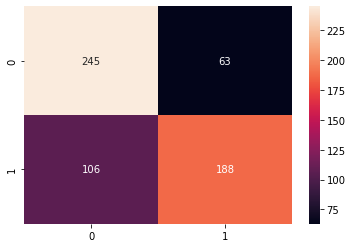

In [26]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_data.iloc[:,:],y_data, test_size=0.3,shuffle=False)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

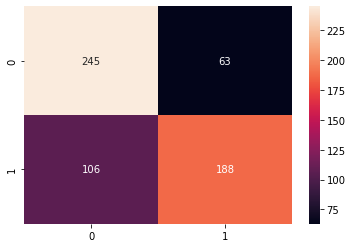

In [27]:
sns.heatmap(cm,annot=True,fmt="d")

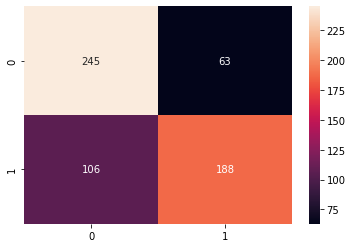

In [29]:
d=sns.heatmap(cm,annot=True,fmt="d")

In [30]:
d.figure.savefig("fffffffffffff.png")

In [20]:
report = classification_report(y_test,clf_rf.predict(x_test))
print('Model accuracy', accuracy_score(y_test,clf_rf.predict(x_test), normalize=True))
print(report)

Model accuracy 0.7425249169435216
              precision    recall  f1-score   support

        -1.0       0.71      0.83      0.77       308
         1.0       0.78      0.65      0.71       294

    accuracy                           0.74       602
   macro avg       0.75      0.74      0.74       602
weighted avg       0.75      0.74      0.74       602



In [32]:
import plotly.express as px
col_sorted_by_importance=clr_rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':x_train.columns[col_sorted_by_importance],
    'imps':clr_rf.feature_importances_[col_sorted_by_importance]
})


fih=px.bar(feat_imp, x='cols', y='imps')

In [33]:
fih.write_image("stat.png", engine="kaleido")

## grid search

C:\Users\raedc\anaconda3\envs\rag\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Accuracy is:  0.7524916943521595


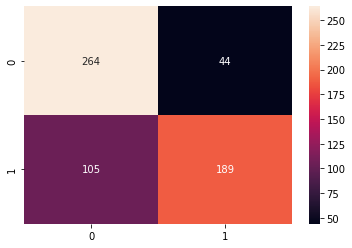

In [22]:


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.3,shuffle=False)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(bootstrap= True,
                                criterion= 'entropy',
                                max_depth= 30,
                                max_features= None,
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                n_estimators= 266,
                                random_state=43,
                                oob_score = True)        
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# Backtest  

In [23]:
from fastquant import get_stock_data
from fastquant import backtest
from fastquant import backtest, get_stock_data
from fastquant import CustomStrategy, BaseStrategy
from fastquant.indicators import MACD, CrossOver 
from fastquant.indicators.custom import CustomIndicator

In [24]:
amzn_data__=Data_engineering("amzn")
Indicateur=amzn_data__.add_Indicator('amzn','2012-01-01','2021-01-01')

AMZN_ = amzn_data__.get_ticker_data('amzn','2012-01-01','2021-01-01','AMZN') 
SP500 = amzn_data__.get_ticker_data('^GSPC','2012-01-01','2021-01-01',"SP500") 

test=amzn_data__.Data_eng(3,Indicateur,AMZN_,SP500,0.02,-0.01,6)
test1=test.dropna()

In [25]:
close=test1["close"]
test1=test1.drop(columns="close")
df=Differencing2(test1)
#df=df.iloc[:200,]
features=df.columns.to_list()
y_data=df[features[-1]]
liss3=[]
for i in df.columns:
  if "return" in i  :
    #print(i)
    liss3.append(i)

for i in liss3[:]:

  features.remove(i)    

X_data=df[features]

Accuracy is:  0.7512437810945274


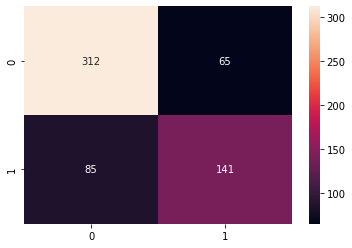

In [26]:



# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_data.iloc[:,:],y_data, test_size=0.3,shuffle=False)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [27]:
def data_for_backtest(x_test,y_test,clf_rf,close7):
    pred_labe=pd.DataFrame(data=clf_rf.predict(x_test),index=x_test.index ,columns=["pred_labe"])
    close1=close7.loc[x_test.index[0]:x_test.index[-1]]
    return pd.concat([x_test,close1,y_test.to_frame(),pred_labe], axis=1)


In [28]:
data_for_backtest=data_for_backtest(x_test,y_test,clf_rf,close)

In [29]:
data_for_backtest

,RSI_14_day_3,RSI_5_day_3,RSI_7_day_3,RSI_50_day_3,ROC_12_day_3,ROC_25_day_3,ROC_200_day_3,MACD_day_3,TRIX_15_day_3,TRIX_30_day_3,...,HighSP500,LowSP500,OpenSP500,HighAMZN,LowAMZN,OpenAMZN,VolumeAMZN,close,new_ label_return,pred_labe
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-02,51.165355,35.357537,41.515747,58.215115,-1.512277,3.054933,-1.226065,0.119781,0.288390,0.255884,...,25.018175,11.224491,0.784520,49.257033,24.172997,15.574320,4.234834e+04,1834.329956,1.0,1.0
2018-08-03,54.666551,47.390377,49.363811,59.118208,0.186295,-0.335684,1.750748,2.010023,0.273570,0.254995,...,31.807748,50.844039,48.226020,20.182860,49.777773,61.146179,-9.418222e+05,1823.290039,-1.0,-1.0
2018-08-06,60.421921,63.420666,60.894466,60.748585,0.672811,4.279691,3.541408,3.253057,0.262178,0.254177,...,35.115072,31.963772,33.508826,21.629123,14.601687,5.364551,-1.796765e+05,1847.750000,-1.0,1.0
2018-08-07,58.063437,56.973749,56.439788,60.022913,-0.614560,-2.814391,-0.833356,-0.995566,0.251793,0.253173,...,33.099132,42.920260,38.521397,36.884548,42.453923,42.793516,-7.705693e+04,1862.479980,-1.0,-1.0
2018-08-08,61.636429,66.425815,63.366855,61.074163,2.849722,1.507779,5.136298,1.785200,0.244754,0.252351,...,22.188663,21.322813,24.510150,38.358930,25.494283,23.264304,5.483005e+05,1886.520020,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,50.285632,56.099962,52.962439,51.432047,-0.885945,1.029718,-2.841899,3.832242,-0.025080,-0.007646,...,44.145245,57.461193,56.783975,83.556575,58.077080,22.684109,1.098762e+06,3240.959961,1.0,1.0
2020-12-17,51.155654,59.159719,55.132612,51.595542,-0.183691,5.187586,4.694230,0.789929,-0.024722,-0.008711,...,43.360578,53.022146,47.524274,46.755330,84.719846,99.062898,-8.301660e+05,3236.080078,-1.0,1.0
2020-12-18,58.443570,77.445122,70.105824,53.094820,3.169502,6.497752,-0.804443,5.916945,-0.018459,-0.008891,...,31.599150,6.352322,39.283876,14.863764,-18.112673,25.900336,2.504989e+06,3201.649902,-1.0,-1.0


In [30]:



# Create a subclass of the BaseStrategy, We call this MAMAStrategy (MACD + ALMA)
class MAMAStrategy(BaseStrategy):
    
    params = (
        ("label_column", "new_ label_return"),
        ("pred_labe", "pred_labe"),   
  
    )

    def __init__(self):
        # Initialize global variables
        super().__init__()
 

        # Set label  from the  column of data
        self.label = CustomIndicator(
            self.data, custom_column=self.params.label_column,
        )

        # Set label  from the  column of data
        self.pred_labe = CustomIndicator(
            self.data, custom_column=self.params.pred_labe,
        )



        
     
        print("===Strategy level arguments===")
        print("PARAMS: ", self.params)
        

    # Buy when the custom indicator is below the lower limit, and sell when it's above the upper limit
    def buy_signal(self):

        #_buy =  self.pred_labe[0] ==1    # Close is above ALMA
        _buy =  self.label[0] ==1    # Close is above ALMA
        return _buy 

    def sell_signal(self):

        #_sell =  self.pred_labe[0] ==-1  
        _sell =  self.label[0] ==-1
        return _sell






# Create a subclass of the BaseStrategy, We call this MAMAStrategy (MACD + ALMA)
class MAMAStrategy_pred(BaseStrategy):
    
    params = (
        ("label_column", "new_ label_return"),
        ("pred_labe", "pred_labe"),   
  
    )

    def __init__(self):
        # Initialize global variables
        super().__init__()
 

        # Set label  from the  column of data
        self.label = CustomIndicator(
            self.data, custom_column=self.params.label_column,
        )

        # Set label  from the  column of data
        self.pred_labe = CustomIndicator(
            self.data, custom_column=self.params.pred_labe,
        )



        
     
        print("===Strategy level arguments===")
        print("PARAMS: ", self.params)
        

    # Buy when the custom indicator is below the lower limit, and sell when it's above the upper limit
    def buy_signal(self):

        _buy =  self.pred_labe[0] ==1    # Close is above ALMA
        #_buy =  self.label[0] ==1    # Close is above ALMA
        return _buy 

    def sell_signal(self):

        _sell =  self.pred_labe[0] ==-1  
        #_sell =  self.label[0] ==-1
        return _sell        

===Strategy level arguments===
PARAMS:  <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_MAMAStrategy object at 0x0000020AADE354C8>


<IPython.core.display.Javascript object>

===Strategy level arguments===
PARAMS:  <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_MAMAStrategy_pred object at 0x0000020AA9F2C2C8>


,final_value,pnl,final_value_pred,pnl_pred
0,164463.548096,64463.55,128811.434204,28811.43


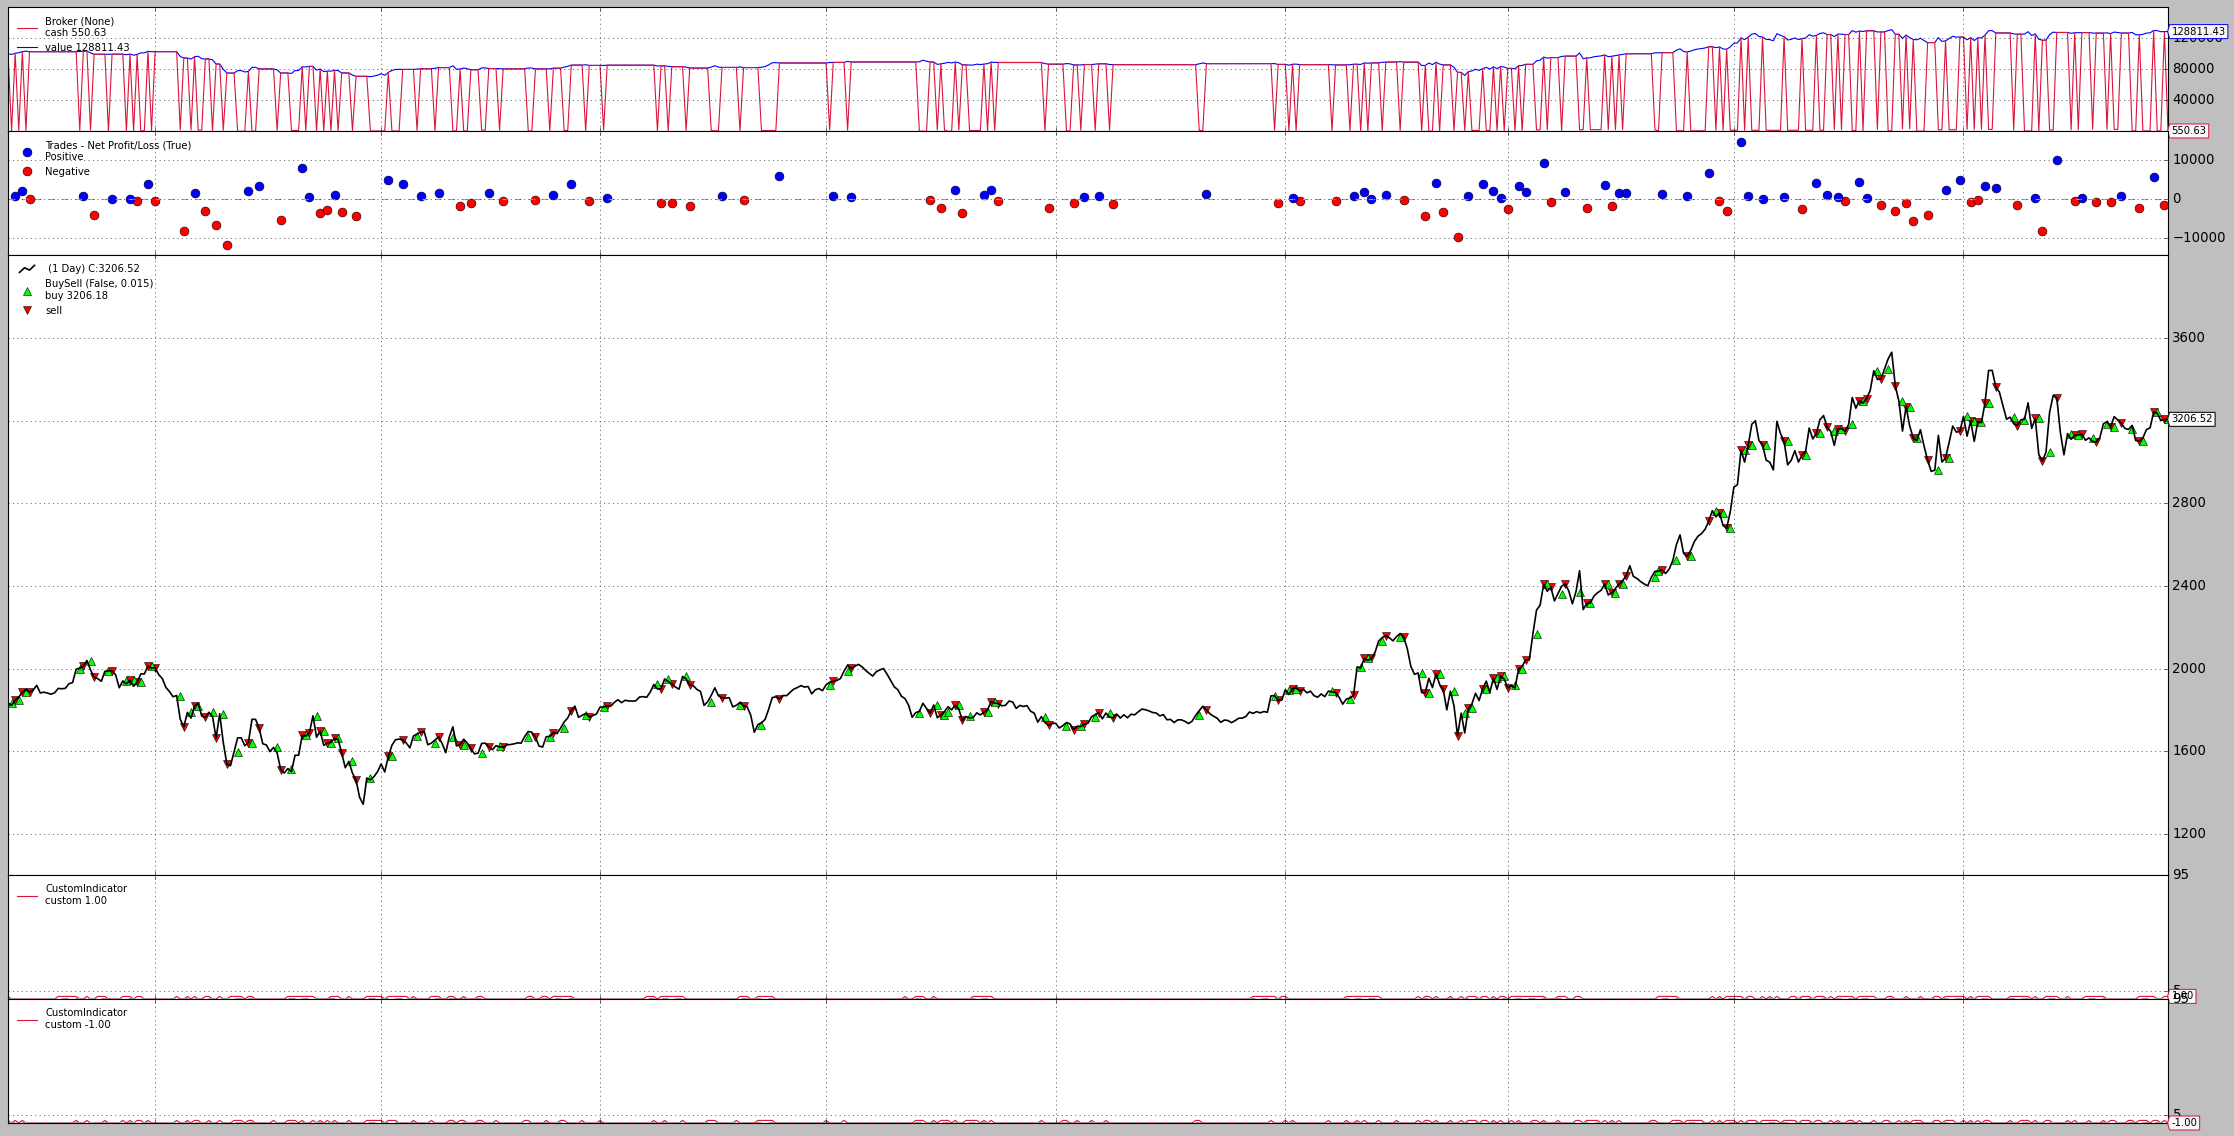

In [34]:
result_real, history = backtest(MAMAStrategy,data_for_backtest, verbose=False, return_history=True)
result_pred, history = backtest(MAMAStrategy_pred,data_for_backtest, verbose=False, return_history=True)
result_pred = result_pred.rename(columns = {'final_value': 'final_value_pred','pnl': 'pnl_pred', }, inplace = False)
pd.concat([result_real[["final_value" ,"pnl"]],result_pred[["final_value_pred" ,"pnl_pred"]]], axis=1)

In [32]:
result

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,42,34,5241.908718,5.241909,-4579.822427,-4.579822,27062.468628,27.062469,-13127.807617,-13.127808
